__LSTM(Long Short-Term Memory)__는 말 그대로 단기 기억을 오래 기억하기 위해 고안된 순환층이다.


In [1]:
#LSTM 신경망 훈련을 위한 세트 준비
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
#각 샘플의 길이를 100으로 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
#LSTM셀을 사용한 순환층 제작
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
#모델 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 16)            8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [9]:
#모델을 컴파일 하고 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)      #학습률 10^-4
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 45ms/step - loss: 0.6922 - accuracy: 0.5446 - val_loss: 0.6913 - val_accuracy: 0.5718
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6886 - accuracy: 0.6168 - val_loss: 0.6859 - val_accuracy: 0.6484
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6728 - accuracy: 0.6679 - val_loss: 0.6524 - val_accuracy: 0.6686
Epoch 4/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6225 - accuracy: 0.7074 - val_loss: 0.6103 - val_accuracy: 0.7182
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5922 - accuracy: 0.7352 - val_loss: 0.5852 - val_accuracy: 0.7350
Epoch 6/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5695 - accuracy: 0.7499 - val_loss: 0.5649 - val_accuracy: 0.7558
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5487 - accuracy: 0.7655 - val_loss: 0.5476 - val_ac

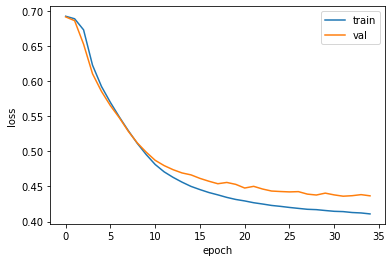

In [10]:
#훈련 과정을 그래프로 표현
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
#드롭아웃을 적용한 순환층 제작
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
#모델을 컴파일 하고 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 49ms/step - loss: 0.6926 - accuracy: 0.5229 - val_loss: 0.6921 - val_accuracy: 0.5402
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6904 - accuracy: 0.5764 - val_loss: 0.6890 - val_accuracy: 0.6156
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6842 - accuracy: 0.6209 - val_loss: 0.6785 - val_accuracy: 0.6438
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6464 - accuracy: 0.6464 - val_loss: 0.6126 - val_accuracy: 0.7130
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5914 - accuracy: 0.7333 - val_loss: 0.5839 - val_accuracy: 0.7436
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5674 - accuracy: 0.7466 - val_loss: 0.5608 - val_accuracy: 0.7412
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5476 - accuracy: 0.7536 - val_loss: 0.5361 - val_ac

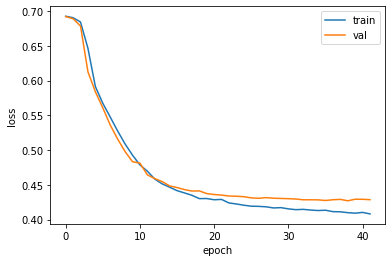

In [17]:
#훈련 과정을 그래프로 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
#2개의 순환층 연결
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
#모델 요약
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [20]:
#모델을 컴파일 하고 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 27s 74ms/step - loss: 0.6928 - accuracy: 0.5450 - val_loss: 0.6923 - val_accuracy: 0.5932
Epoch 2/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6909 - accuracy: 0.6102 - val_loss: 0.6885 - val_accuracy: 0.6600
Epoch 3/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6785 - accuracy: 0.6442 - val_loss: 0.6566 - val_accuracy: 0.6694
Epoch 4/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6235 - accuracy: 0.6962 - val_loss: 0.5952 - val_accuracy: 0.7172
Epoch 5/100
313/313 [==============================] - 23s 72ms/step - loss: 0.5837 - accuracy: 0.7270 - val_loss: 0.5676 - val_accuracy: 0.7326
Epoch 6/100
313/313 [==============================] - 26s 84ms/step - loss: 0.5588 - accuracy: 0.7405 - val_loss: 0.5436 - val_accuracy: 0.7496
Epoch 7/100
313/313 [==============================] - 24s 76ms/step - loss: 0.5371 - accuracy: 0.7531 - val_loss: 0.5292 - val_ac

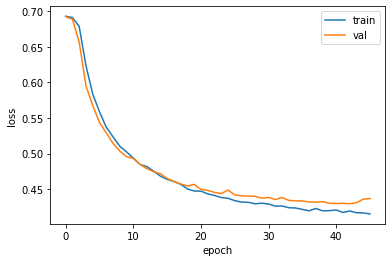

In [21]:
#훈련 과정을 그래프로 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

__GRU(Gated Recurrent Unit)__은 LSTM을 간소화한 버전이라 생각할 수 있다. 이 샐은 LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있다. GRU셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어있다. 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용한다.<br/>
GRU 셀은 LSTM 셀보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않은 좋은 성능을 내는 것으로 알려져 있다.

In [22]:
#GRU 모델 만들기
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.LSTM(8, dropout=0.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_6 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [24]:
#모델을 컴파일 하고 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6928 - accuracy: 0.5228 - val_loss: 0.6924 - val_accuracy: 0.5446
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6916 - accuracy: 0.5749 - val_loss: 0.6909 - val_accuracy: 0.5842
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6892 - accuracy: 0.6036 - val_loss: 0.6878 - val_accuracy: 0.6112
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6841 - accuracy: 0.6305 - val_loss: 0.6805 - val_accuracy: 0.6380
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6706 - accuracy: 0.6619 - val_loss: 0.6562 - val_accuracy: 0.6902
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6124 - accuracy: 0.7092 - val_loss: 0.5776 - val_accuracy: 0.7142
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5585 - accuracy: 0.7266 - val_loss: 0.5481 - val_ac

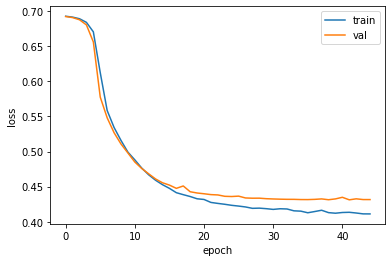

In [25]:
#훈련 과정을 그래프로 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()